# **Loan Eligibility Prediction Using Machine Learning Models**

## Introduction

This notebook explores a classification problem where we predict **loan eligibility** based on customer data, such as income, credit history, and other relevant factors using decision tree and random forest models.

## Data Collection

#### Importing Libraries

In [135]:
#Data Manipulations, Analysis and Visualiasations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for machine learning model building, evaluation, and data preprocessing

from sklearn.model_selection import train_test_split      #splitting data
from sklearn.preprocessing import LabelEncoder            #Encode catagorical variables
from sklearn.impute import SimpleImputer                  #Impute missing data
from sklearn.tree import DecisionTreeClassifier , plot_tree       # Decision tree classification model and visualization 
from sklearn.ensemble import RandomForestClassifier                # Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix     #model evaluation
from sklearn.metrics import roc_auc_score    #evaluate the model's performance
from sklearn.metrics import roc_curve       #to plot roc curve

#### Loading Dataset

In [143]:
data= pd.read_excel(r"C:\Users\HAFSA SHAJAHAN\Downloads\loan-prediction.xlsx")

#### Exploring Dataset

In [51]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
data.shape

(614, 13)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
#separating numerical and categorical variables for the ease of encoding
numcols=['ApplicantIncome','CoapplicantIncome','LoanAmount']
catcols=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
num_data = data[numcols]
cat_data = data[catcols]

In [40]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Data Cleaning

#### Handling Missing Values and Duplicates

In [148]:
#Checking for missing values
print("Missing value sum")
print(data.isnull().sum())  

#Checking for Duplicates
print("Duplicate sum")
print(data.duplicated().sum()) 

Missing value sum
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Duplicate sum
0


In [150]:
#Imputing MissingValues

#median for numerical variables
imputer_num = SimpleImputer(strategy='median')
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

#mode for categorical variables
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#### Removing non-relevent variables

In [186]:
data = data.drop(columns=['Loan_ID'])

#### Standardising Text Values

In [80]:
data['Property_Area']= data['Property_Area'].replace({'semiurban':'Semiurban', 'Semi-urban':'Semiurban'})

## Exploratory Data Analysis

Frequency table and box plot for Categorical Variables and measures of central tendancy and spread for numerical data

#### Count of aprroved and non-approved loan

Count of loan approval
Loan_Status
Approved        422
Not Approved    192
Name: count, dtype: int64


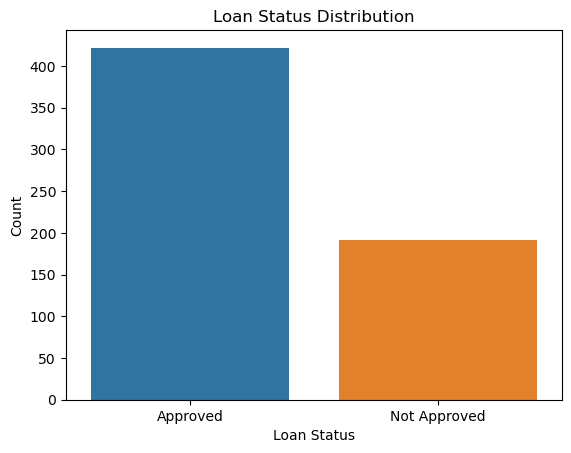

In [82]:
#subsetting loan approved data
approved_data=data[data["Loan_Status"] == "Y"]

data['Loan_Status'] = data['Loan_Status'].replace({'Y': 'Approved', 'N': 'Not Approved'})
print("Count of loan approval")
print(data['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Here we can see that most of the loans are approved.

#### Number of people who took loan grouped by gender

Gender
Male      502
Female    112
Name: count, dtype: int64
Gender
Male      347
Female     75
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

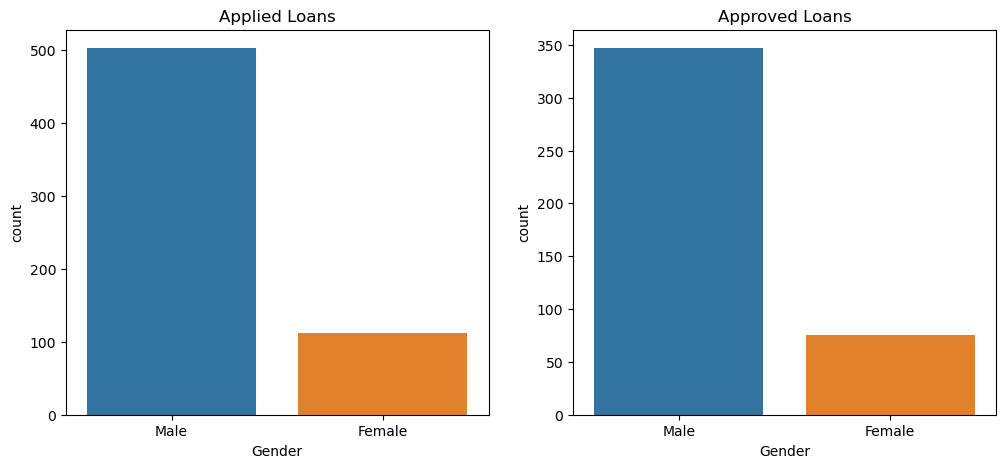

In [84]:
print(data['Gender'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Gender', data=data)
plt.title("Applied Loans")

print(approved_data['Gender'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=approved_data)
plt.title("Approved Loans")      

 Majority of people who apply and get approved for loan are male

#### Number of people who took loan grouped by Marrital status

Married
Yes    401
No     213
Name: count, dtype: int64
Married
Yes    288
No     134
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

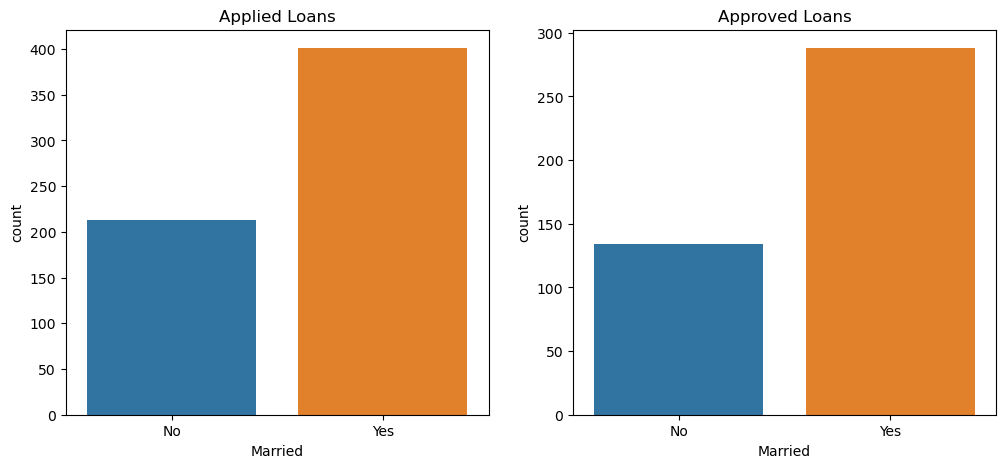

In [11]:
print(data['Married'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Married', data=data)
plt.title("Applied Loans")

print(approved_data['Married'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Married', data=approved_data)
plt.title("Approved Loans")      

 Majority of people who apply and get approved for loan are married

#### Dependents and Loan Approval

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Dependents
0     247
2      76
1      66
3+     33
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

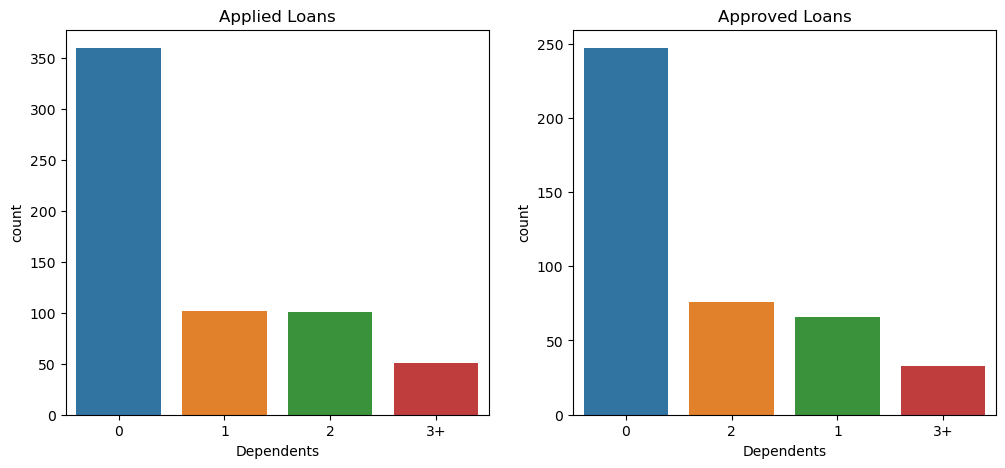

In [84]:
print(data['Dependents'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Dependents', data=data)
plt.title("Applied Loans")

print(approved_data['Dependents'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Dependents', data=approved_data)
plt.title("Approved Loans")    

Majority of people who apply and get approved for loan have zero dependents

#### Number of people who took loan grouped by education

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Education
Graduate        340
Not Graduate     82
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

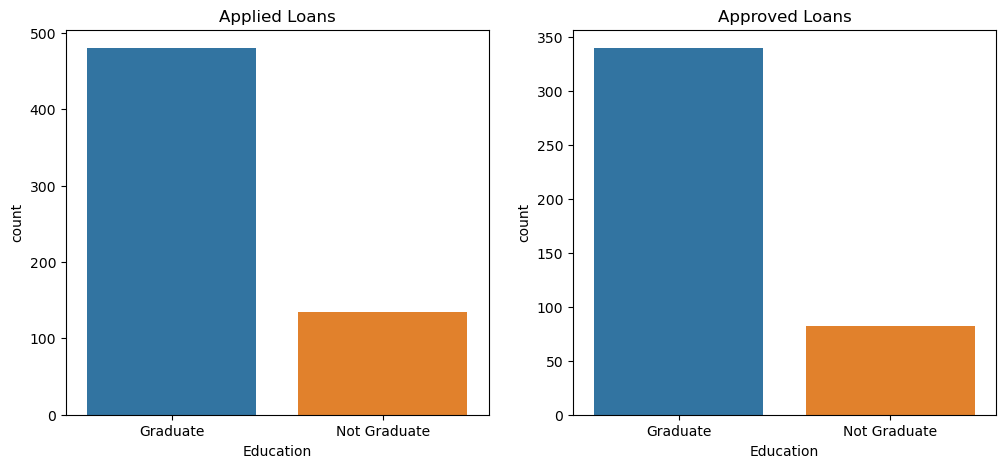

In [118]:
print(data['Education'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Education', data=data)
plt.title("Applied Loans")

print(approved_data['Education'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Education', data=approved_data)
plt.title("Approved Loans") 

Majority of people who apply and get approved for loan have zero graduates

#### Number of people who took loan grouped by self-employment

Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Self_Employed
No     366
Yes     56
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

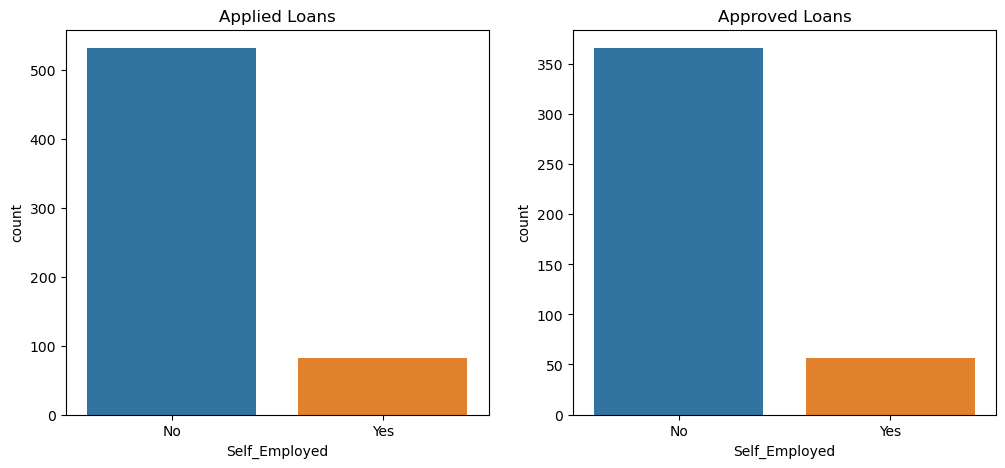

In [125]:
print(data['Self_Employed'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Self_Employed', data=data)
plt.title("Applied Loans")

print(approved_data['Self_Employed'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Self_Employed', data=approved_data)
plt.title("Approved Loans") 

Majority of people who apply and get approved for loan are not self employed

#### Number of people who took loan grouped by property area

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Property_Area
Semiurban    179
Urban        133
Rural        110
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

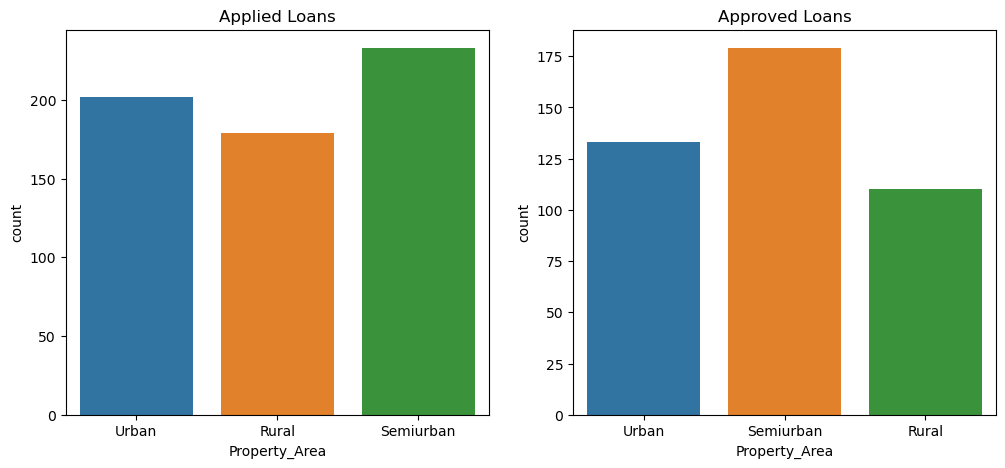

In [172]:
print(data['Property_Area'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Property_Area', data=data)
plt.title("Applied Loans")

print(approved_data['Property_Area'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Property_Area', data=approved_data)
plt.title("Approved Loans") 

Majority of people who apply and get approved for loan are from semi urban area

#### Loan Amount Term Count

Count of loan Amount Term
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


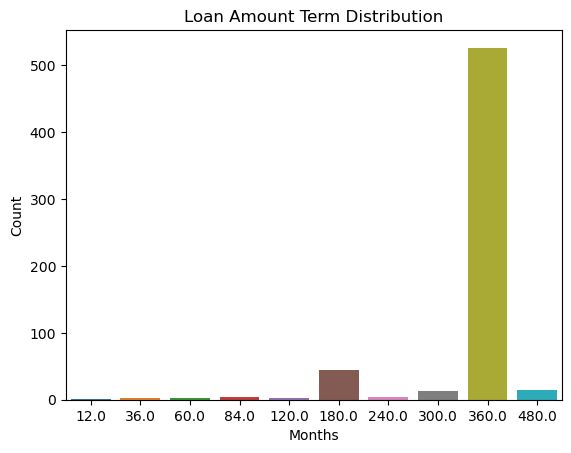

In [171]:
print("Count of loan Amount Term")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data)
plt.title('Loan Amount Term Distribution')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

Majority Loan Amount terms are 360 months i.e. 30 years

#### Credit History Impact

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
Credit_History
1.0    415
0.0      7
Name: count, dtype: int64


Text(0.5, 1.0, 'Approved Loans')

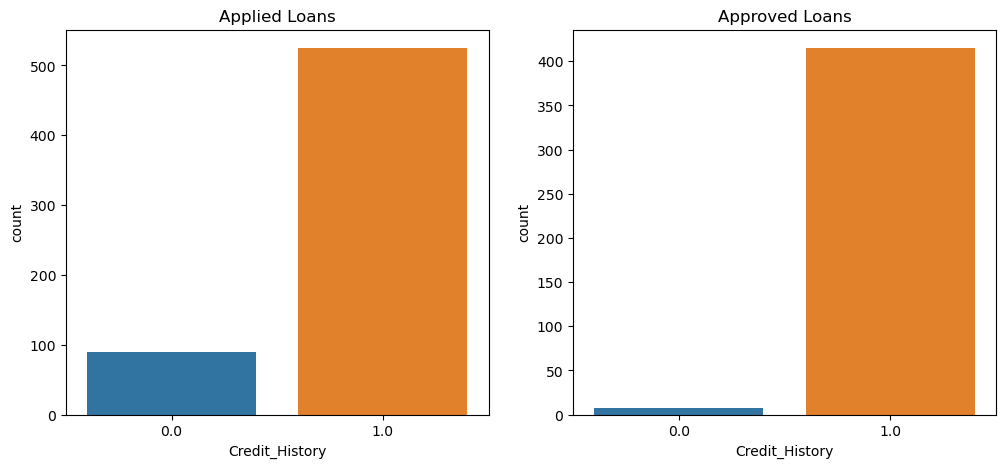

In [91]:
print(data['Credit_History'].value_counts())
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)      
sns.countplot(x='Credit_History', data=data)
plt.title("Applied Loans")

print(approved_data['Credit_History'].value_counts())
plt.subplot(1, 2, 2)
sns.countplot(x='Credit_History', data=approved_data)
plt.title("Approved Loans") 

Majority of people who apply and get approved for loan have good credit history.

#### Loan amount central tendancy and spread

In [65]:
print(data['LoanAmount'].describe())
print("Median:", data['LoanAmount'].median())

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64
Median: 128.0


Mean 145.752443 is greater than Median 128.0 : the distribution is likely to be right-skewed.
standard Deviation is higher than mean. i.e data points are spread out over a wide range.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


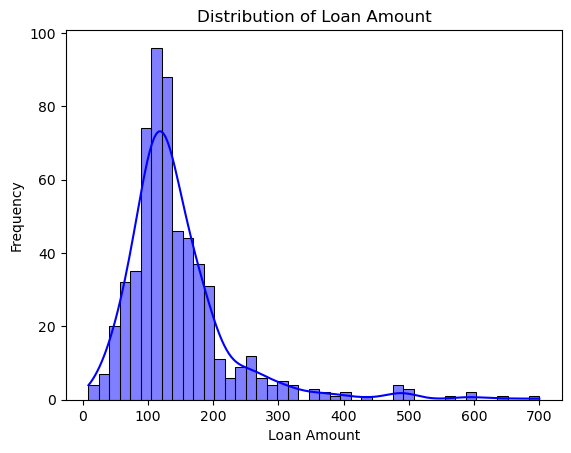

In [6]:
sns.histplot(data['LoanAmount'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Here we can see that the Loan amount is right skewed

In [190]:
#Checking outliers
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['LoanAmount'] < lower_bound) | (data['LoanAmount'] > upper_bound)]
print(outliers.head())

print(outliers.shape)

    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
5     Male     Yes          2  Graduate           Yes             5417   
9     Male     Yes          1  Graduate            No            12841   
21    Male     Yes          1  Graduate            No             5955   
34    Male      No         3+  Graduate            No            12500   
54  Female     Yes          1  Graduate           Yes            11500   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
5              4196.0       267.0             360.0             1.0   
9             10968.0       349.0             360.0             1.0   
21             5625.0       315.0             360.0             1.0   
34             3000.0       320.0             360.0             1.0   
54                0.0       286.0             360.0             0.0   

   Property_Area Loan_Status  
5          Urban           Y  
9      Semiurban           N  
21         Urban           Y  
34  

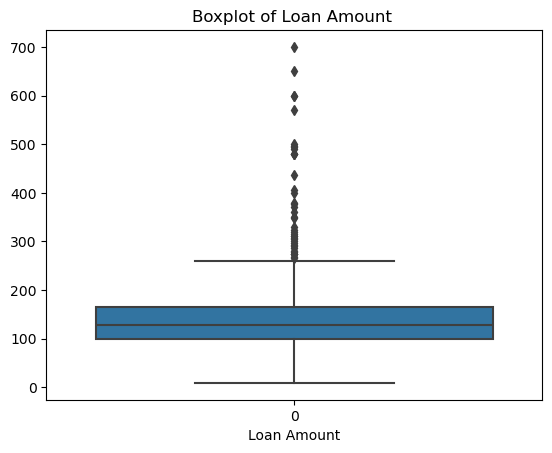

In [180]:
#Visualising spread and outliers
sns.boxplot(data['LoanAmount'])
plt.title('Boxplot of Loan Amount ')
plt.xlabel('Loan Amount')
plt.show()

This high proportion of data is being classified as outliers could be because of high variability in data 

#### Applicant income central tendancy and spread

In [46]:
print(data['ApplicantIncome'].describe())
print("Median:", data['ApplicantIncome'].median())

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
Median: 3812.5


mean 5403.459283 is greater than Median 3812.5 : the distribution is likely to be right-skewed.standard Deviation is higher than mean. i.e data points are spread out over a wide range.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


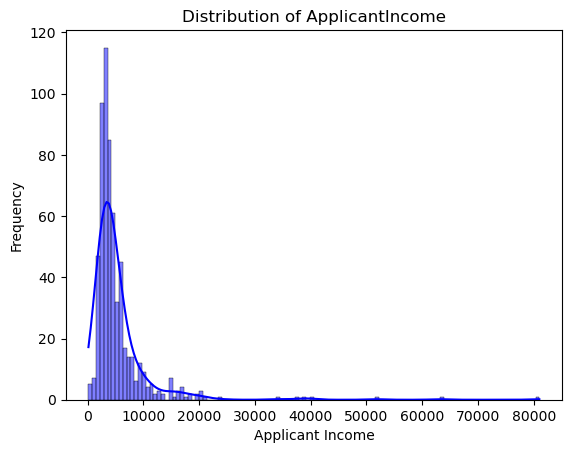

In [53]:
sns.histplot(data['ApplicantIncome'], kde=True, color='blue')
plt.title('Distribution of ApplicantIncome')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

Here we can see that the Applicant income is right skewed

In [193]:
#Checking outliers
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['ApplicantIncome'] < lower_bound) | (data['ApplicantIncome'] > upper_bound)]
print(outliers.head())
print(outliers.shape)

     Gender Married Dependents Education Self_Employed  ApplicantIncome  \
9      Male     Yes          1  Graduate            No            12841   
34     Male      No         3+  Graduate            No            12500   
54   Female     Yes          1  Graduate           Yes            11500   
67     Male     Yes          1  Graduate            No            10750   
102    Male     Yes          0  Graduate            No            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
9              10968.0       349.0             360.0             1.0   
34              3000.0       320.0             360.0             1.0   
54                 0.0       286.0             360.0             0.0   
67                 0.0       312.0             360.0             1.0   
102                0.0       128.0             360.0             1.0   

    Property_Area Loan_Status  
9       Semiurban           N  
34          Rural           N  
54          Urban   

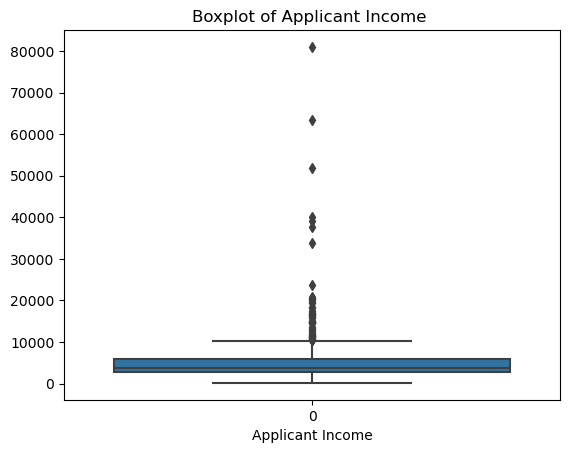

In [55]:
sns.boxplot(data['ApplicantIncome'])
plt.title('Boxplot of Applicant Income ')
plt.xlabel('Applicant Income')
plt.show()

This high proportion of data is being classified as outliers could be because of high variability in data 

####  Co applicantcentral tendancy and spread

In [74]:
print(data['CoapplicantIncome'].describe())
print("Median:", data['CoapplicantIncome'].median())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Median: 1188.5


mean 1621.245798 is greater than Median 1188.5 : the distribution is likely to be right-skewed.Standard Deviation is higher than mean. i.e data points are spread out over a wide range.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


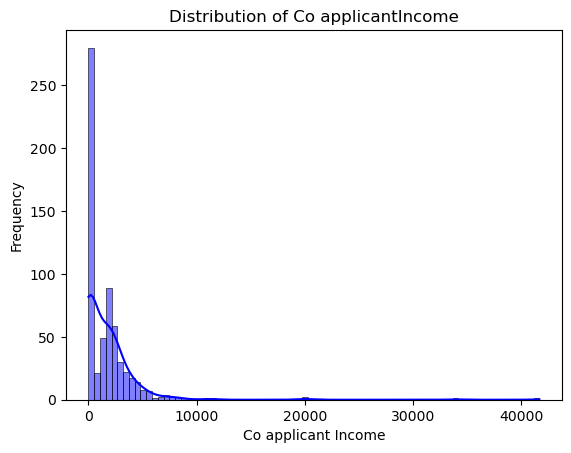

In [81]:
sns.histplot(data['CoapplicantIncome'], kde=True, color='blue')
plt.title('Distribution of Co applicantIncome')
plt.xlabel('Co applicant Income')
plt.ylabel('Frequency')
plt.show()

Distribution highly skewed because of overwhelming amount of zeroes, which might indicate a lot of applicants doesn't have a co applicant.But it seems like the non-zero values are following a right skewed distribution similar to loan amount and applicant income. We might need to create a new binary feature to represent this information.

most loan terms may be clustered around 360 months and others are significantly shorter.

#### Bivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


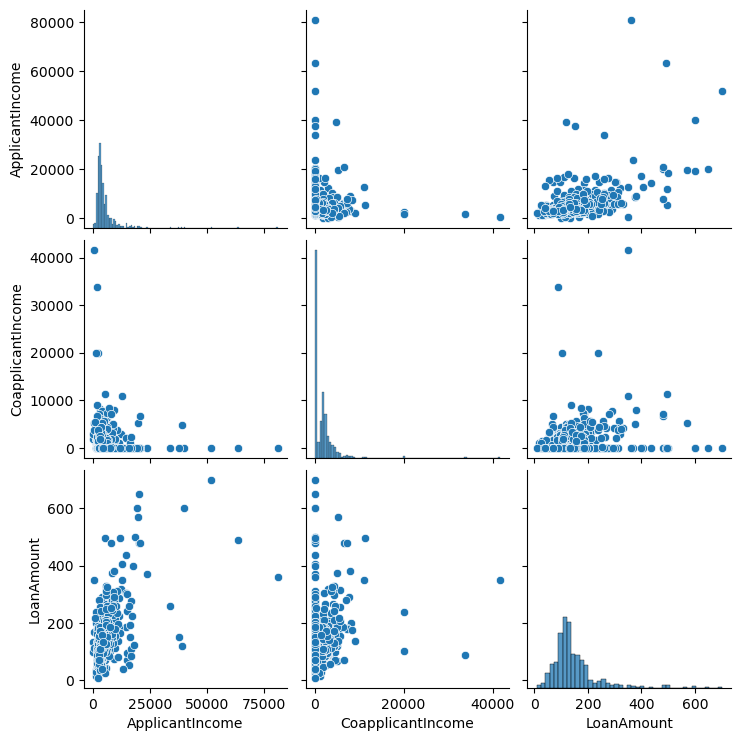

In [197]:
#pair plots
sns.pairplot(num_data)

plt.show()

positive correlation for Loan Amount and Applicant Income.

positive correlation if no co applicants are ignored between Loan Amount and Co applicant Income

Slightly negative correlation between Co applicant Income and applicant Income

In [199]:
# Correlation matrix
num_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


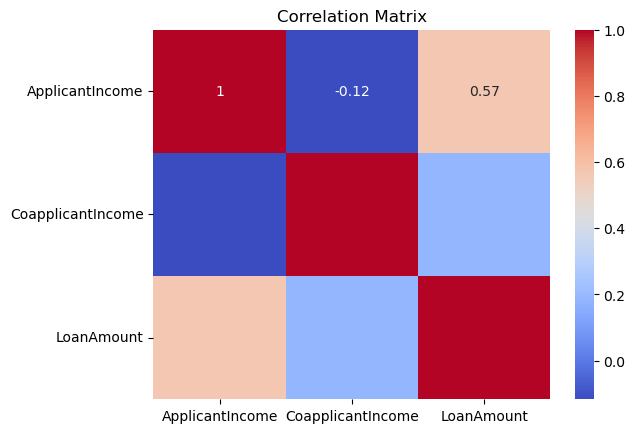

In [201]:
# Correlation Heatmap
sns.heatmap(num_data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

#### Encoding Categorical Variables

In [86]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)
# Label Encoding
label_encoder = LabelEncoder()
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Loan_Status'] =  label_encoder.fit_transform(data['Loan_Status'])
data['Credit_History'] = label_encoder.fit_transform(data['Credit_History'])
data['Loan_Amount_Term'] = label_encoder.fit_transform(data['Loan_Amount_Term'])
# One-Hot Encoding 
data = pd.get_dummies(data, columns=['Gender', 'Property_Area'], drop_first=True)

In [54]:
data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Has_Co_Applicant,Loan_to_Income_Ratio,Loan_log,applicant_log,Coapplicant_log
0,0,0,0,0,5849,0.0,128.0,8,1,0,True,False,True,5849.0,0,0.021884,4.852030,8.674026,NaN
1,1,1,0,0,4583,1508.0,128.0,8,1,1,True,False,False,6091.0,1,0.021015,4.852030,8.430109,7.319202
2,1,0,0,1,3000,0.0,66.0,8,1,0,True,False,True,3000.0,0,0.022000,4.189655,8.006368,NaN
3,1,0,1,0,2583,2358.0,120.0,8,1,0,True,False,True,4941.0,1,0.024287,4.787492,7.856707,7.765993
4,0,0,0,0,6000,0.0,141.0,8,1,0,True,False,True,6000.0,0,0.023500,4.948760,8.699515,NaN


#### Creating new features

In [88]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['Has_Co_Applicant'] = np.where(data['CoapplicantIncome'] > 0, 1, 0)

data['Loan_to_Income_Ratio'] = data['LoanAmount'] / (data['ApplicantIncome'] + data['CoapplicantIncome'])

In [243]:
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Has_Co_Applicant,Loan_to_Income_Ratio
0,LP001002,0,0,0,0,5849,0.0,128.0,8,1,1,True,False,True,5849.0,0,0.021884
1,LP001003,1,1,0,0,4583,1508.0,128.0,8,1,0,True,False,False,6091.0,1,0.021015
2,LP001005,1,0,0,1,3000,0.0,66.0,8,1,1,True,False,True,3000.0,0,0.022000
3,LP001006,1,0,1,0,2583,2358.0,120.0,8,1,1,True,False,True,4941.0,1,0.024287
4,LP001008,0,0,0,0,6000,0.0,141.0,8,1,1,True,False,True,6000.0,0,0.023500


In [255]:
data.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Has_Co_Applicant,Loan_to_Income_Ratio
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,7.667752,0.855049,0.687296,7024.705081,0.555375,0.023877
std,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,1.109224,0.352339,0.463973,6458.663872,0.497329,0.008707
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1442.000000,0.000000,0.002523
25%,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,4166.000000,0.000000,0.019221
50%,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,1.000000,5416.500000,1.000000,0.024129
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,1.000000,7521.750000,1.000000,0.028158
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,1.000000,81000.000000,1.000000,0.082712


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


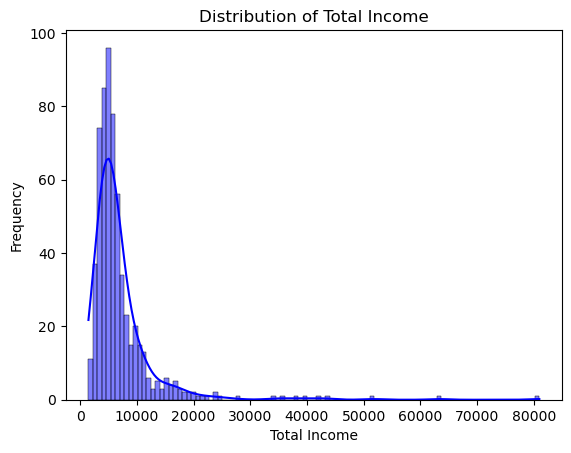

In [247]:
#checking distribution of newly created features
sns.histplot(data['Total_Income'], kde=True, color='blue')
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()

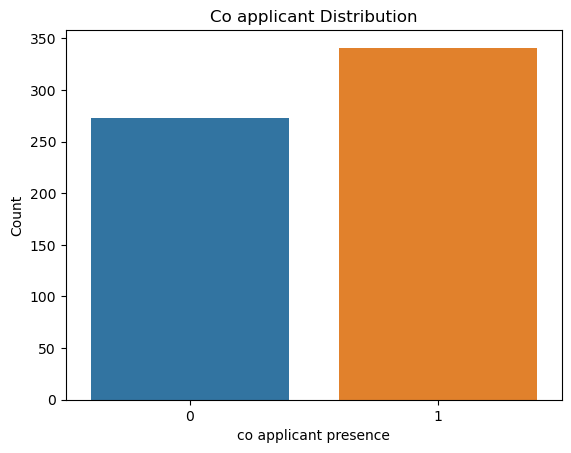

In [251]:
sns.countplot(x='Has_Co_Applicant', data=data)
plt.title('Co applicant Distribution')
plt.xlabel('co applicant presence')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


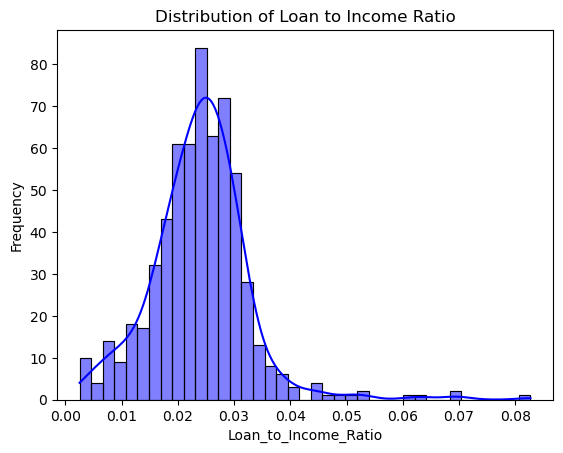

In [253]:
sns.histplot(data['Loan_to_Income_Ratio'], kde=True, color='blue')
plt.title('Distribution of Loan to Income Ratio')
plt.xlabel('Loan_to_Income_Ratio')
plt.ylabel('Frequency')
plt.show()

####  Normalisation

In [ ]:
#Applying log transformation to skewed variables

data['Loan_log']= np.log(data['LoanAmount'])
data['applicant_log']= np.log(data['ApplicantIncome'])
data['Coapplicant_log'] =np.log(data['CoapplicantIncome'] +1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


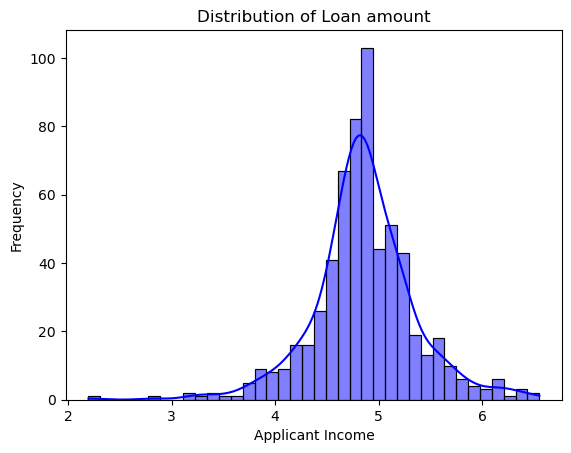

In [259]:
#Checking distibution of log transformed loan amount distribution
sns.histplot(data['Loan_log'], kde=True, color='blue')
plt.title('Distribution of Loan amount')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


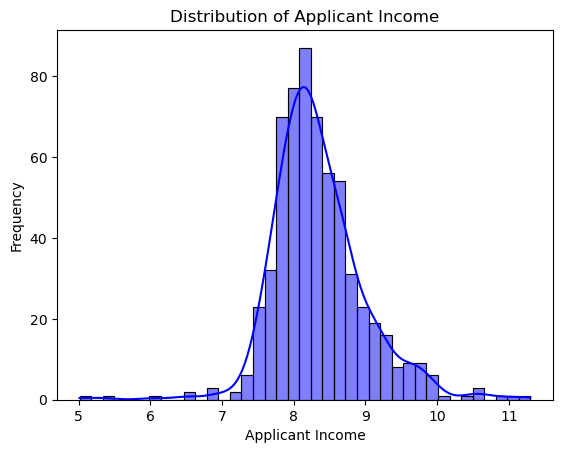

In [261]:
#Checking distibution of log transformed applicant income distribution
sns.histplot(data['applicant_log'], kde=True, color='blue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


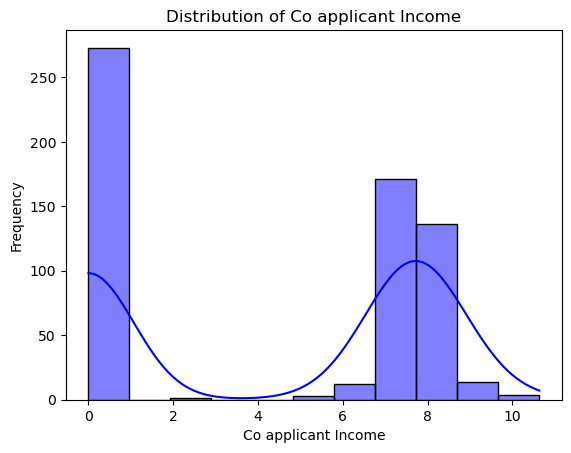

In [92]:
#Checking distibution of log transformed coapplicant income distribution
sns.histplot(data['Coapplicant_log'], kde=True, color='blue')
plt.title('Distribution of Co applicant Income')
plt.xlabel('Co applicant Income')
plt.ylabel('Frequency')
plt.show()

This shape is due to overwhelming amount of zeroes

## Model

#### Splitting Data

In [94]:
# Defining Target and Feature Variables
X = data.drop('Loan_Status', axis=1)  
y = data['Loan_Status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Decision Tree

[1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1]


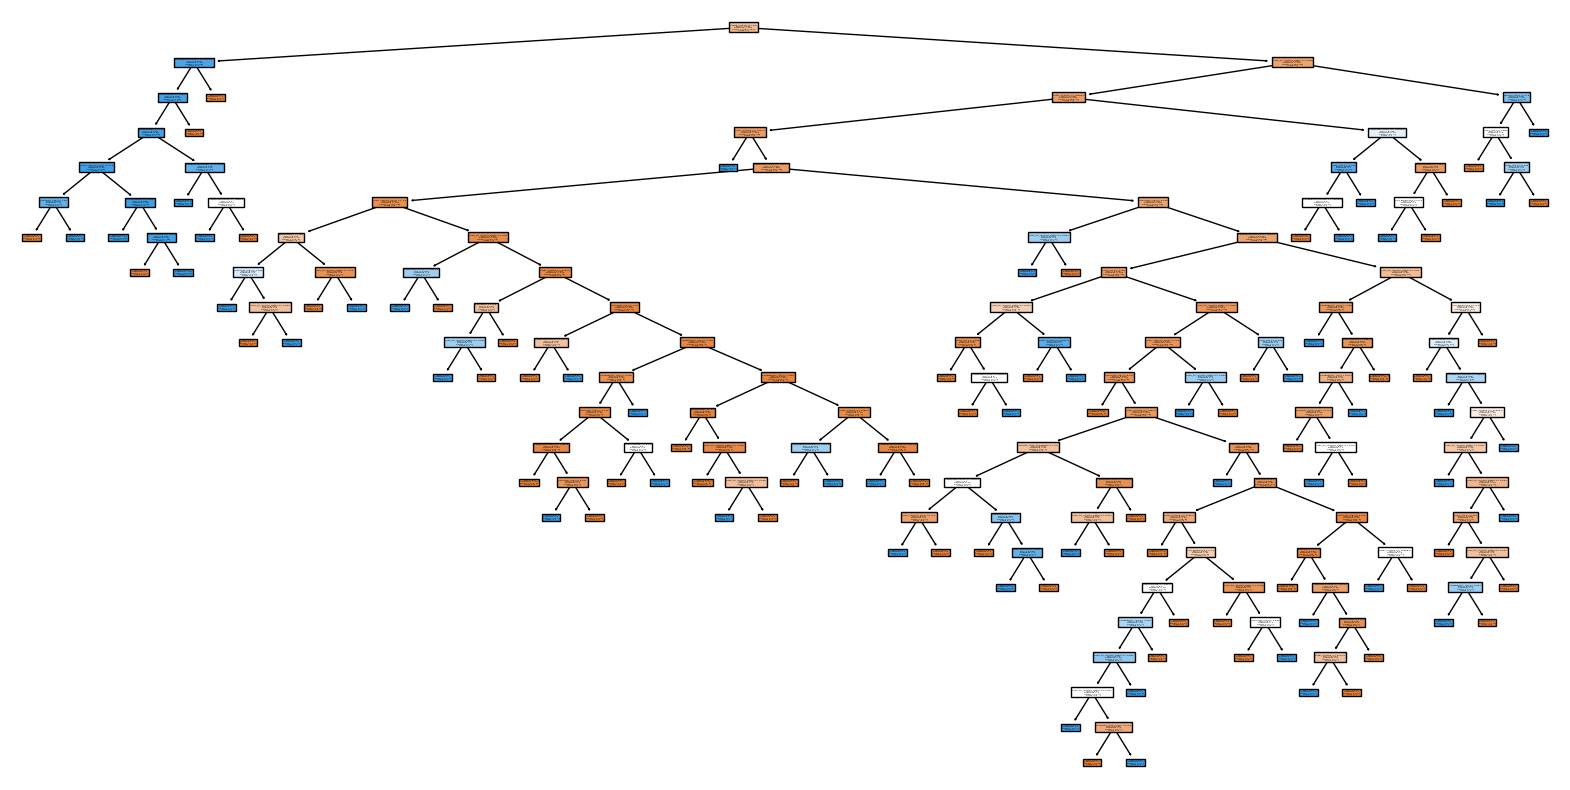

In [212]:
### Training Model

dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Making Prediction

y_pred_dt = dt.predict(X_test)

print(y_pred_dt)

#Visualising decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

#### Random Forest

In [ ]:
### Training Model


rf= RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Making Prediction

y_pred_rf = rf.predict(X_test)

print(y_pred_rf) 

## Evaluation

Evaluating using  Confusion Matrix, Classification report,Accuracy score and Cross Validation

#### confution matrix

Decision Tree Results:
[[68 17]
 [16 22]]
Random Forest Results:
[[75 10]
 [18 20]]


Text(627.9949494949494, 0.5, 'Actual Labels')

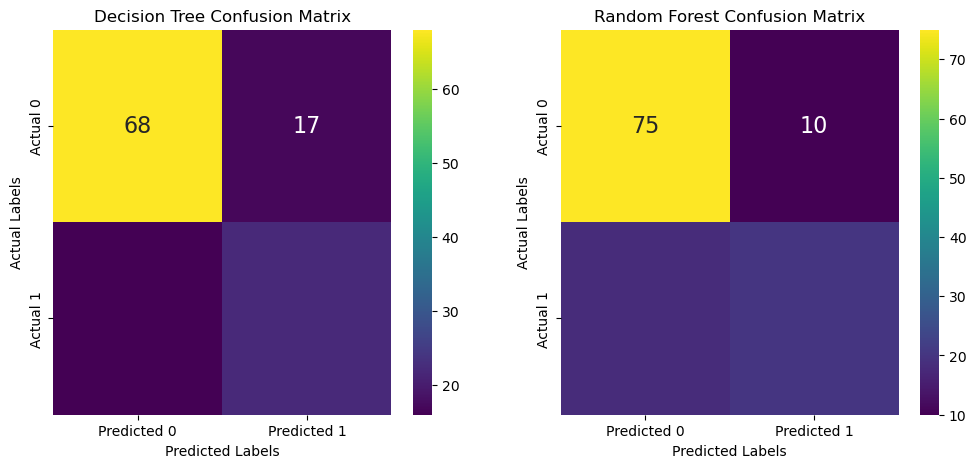

In [282]:
#results
cmdt=confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Results:")
print(cmdt)     

cmrf=confusion_matrix(y_test, y_pred_rf)
print("Random Forest Results:")
print(cmrf)

#### Classification Report

In [108]:
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        85
           1       0.56      0.58      0.57        38

    accuracy                           0.73       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.73      0.73      0.73       123

Random Forest Results:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        85
           1       0.67      0.53      0.59        38

    accuracy                           0.77       123
   macro avg       0.74      0.70      0.72       123
weighted avg       0.76      0.77      0.76       123



#### Accuracy scores

In [238]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.7317073170731707
Random Forest Accuracy: 0.7723577235772358


In [240]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("Decition Tree ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Decition Tree ROC-AUC: 0.6894736842105263
Random Forest ROC-AUC: 0.7643962848297213


#### Cross validation

#### ROC-AUC

In [116]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42, n_estimators=100), X, y, cv=5)

print("Decision Tree CV Mean Accuracy:", dt_cv_scores.mean())
print("Random Forest CV Mean Accuracy:", rf_cv_scores.mean())

Decision Tree CV Mean Accuracy: 0.732880181260829
Random Forest CV Mean Accuracy: 0.7948020791683327


#### Featre Importance

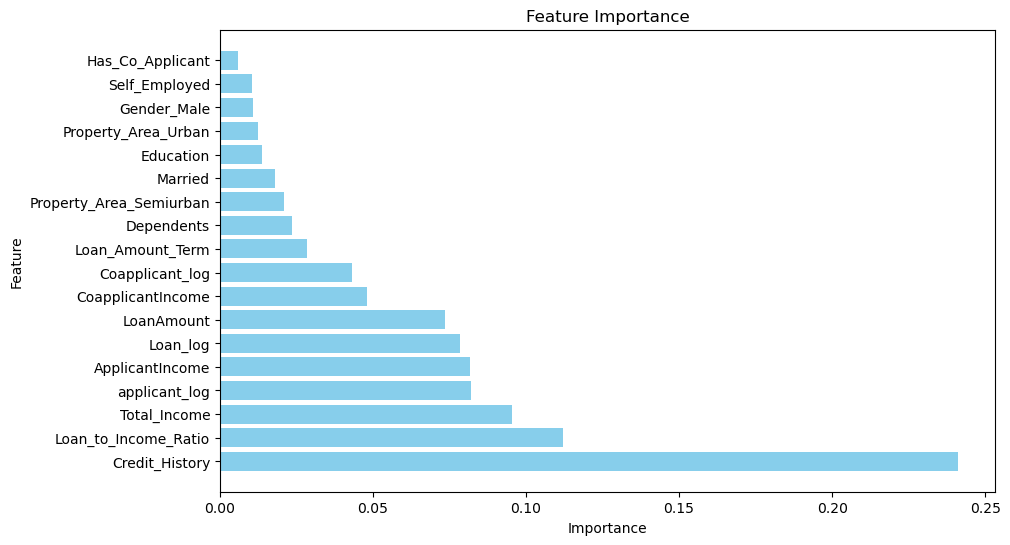

In [118]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Model Comparison

#### Confusion Matix

Text(627.9949494949494, 0.5, 'Actual Labels')

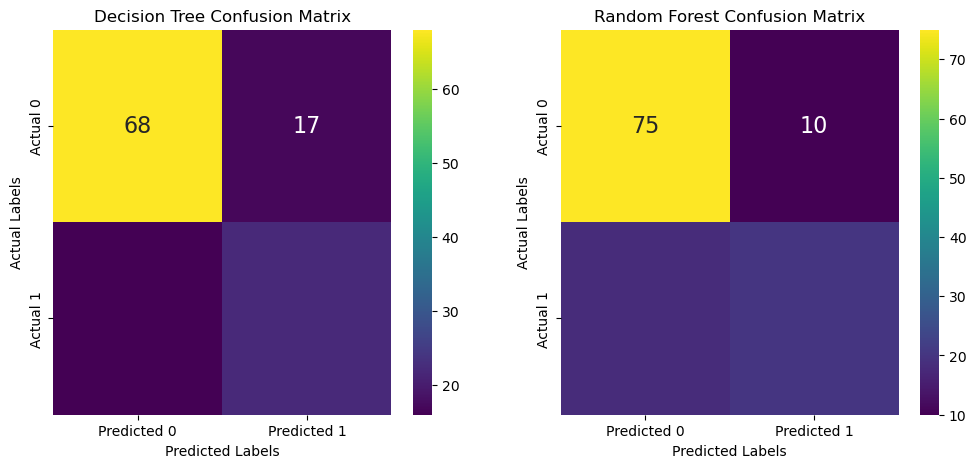

In [291]:
# Plotting Decision Tree Confusion Matrix
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cmdt, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'],annot_kws={"size": 16})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Plotting Random Forest Confusion Matrix
plt.subplot(1,2,2)
sns.heatmap(cmrf, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'],annot_kws={"size": 16})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#### ROC curve

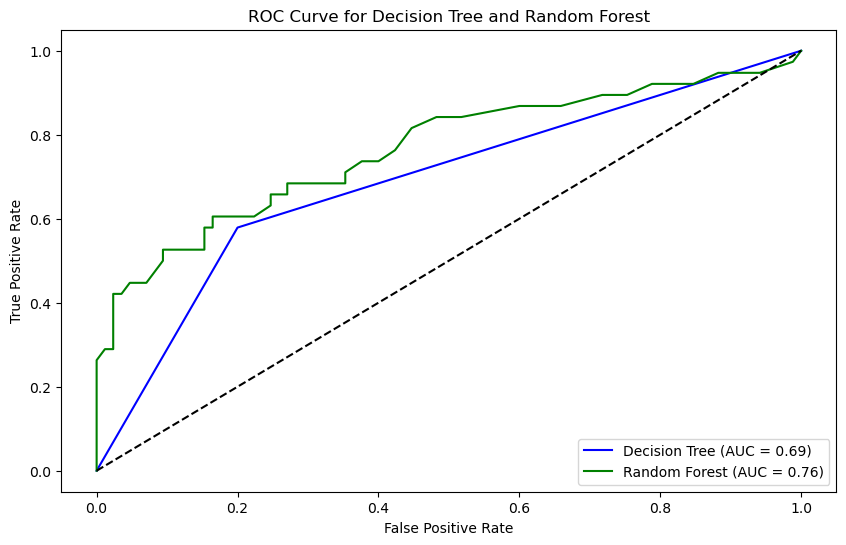

In [284]:
# Calculate ROC curve for Decision Tree
fprdt, tprdt, _ = roc_curve(y_test, y_prob_dt)     # _ to avoid
# Calculate ROC curve for Random Forest
fprrf, tprrf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(fprdt, tprdt, color='blue', label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))


# Plot ROC curve for Random Forest
plt.plot(fprrf, tprrf, color='green', label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))

# Plot settings
plt.plot([0, 1], [0, 1], color='black', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree and Random Forest')
plt.legend(loc='lower right')
plt.show()


#### Metrics Overview
| Metric                | Decision Tree | Random Forest |
|-----------------------|---------------|---------------|
|Accuracy               | 73.24%        | 77.24%       |
| ROC-AUC Score         | 0.69          |0.76          |
| Cross-Validation Mean | 73.28%       | 79.48%        |





## Insights and Findings 

1. **Random Forest Outperformed Decision Tree**:
   -The Confusion Matrix for Random Forest shows a better balance between true positives and true negatives, which suggests that Random Forest makes fewer misclassifications.
   - Classification Report for Random Forest performed better in terms of precision, recall, and F1-score, indicating a more effective identification of both approved and rejected loans.
   - Random Forest achieved higher accuracy and ROC-AUC scores, indicating better generalization on the test data(TPR rate is higher).
   - Cross-validation also confirmed the robustness and reliability of Random Forest compared to Decision Tree.

2. **Feature Importance**:  
   - **Credit History** is the most influential feature, confirming its strong relationship with loan eligibility.

## Conclusion

Random Forest is the recommended model for this loan eligibility prediction task due to its superior accuracy and robustness.